[캐글](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/human/DL/digital_marketing_campaign_dataset.csv')

In [ ]:
df.tail()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1
7999,15999,31,Female,93002,Email,Awareness,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,18,9,9,341,IsConfid,ToolConfid,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
df['AdvertisingTool'].value_counts()

,count
AdvertisingTool,
ToolConfid,8000


In [ ]:
# 리포트 생성
#!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="marketing Report", explorative=True)

# VS Code 결과창에 바로 출력
#profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
# 1. 리포트를 HTML 파일로 저장
output_file = "marketing_report.html"
profile.to_file(output_file)

import os
print("-" * 50)
print(f"리포트 저장이 완료되었습니다!")
print(f"저장 경로: {os.path.abspath(output_file)}")
print("-" * 50)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

--------------------------------------------------
✅ 리포트 저장이 완료되었습니다!
📍 저장 경로: /content/life_expectancy_analysis_report.html
--------------------------------------------------


# 데이터 전처리

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 단일 값 변수와 ID열 제거
df = df.drop(['CustomerID','AdvertisingTool', 'AdvertisingPlatform'], axis=1)

# 성별 1,0매핑
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# 범주형 변수 원-핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
categorical_cols = ['CampaignChannel', 'CampaignType']
encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# 인코딩 한 변수 합치기
df_final = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

print(df_final.head())

   Age  Gender  Income      AdSpend  ClickThroughRate  ConversionRate  \
0   56       0  136912  6497.870068          0.043919        0.088031   
1   69       1   41760  3898.668606          0.155725        0.182725   
2   46       0   88456  1546.429596          0.277490        0.076423   
3   32       0   44085   539.525936          0.137611        0.088004   
4   60       0   83964  1678.043573          0.252851        0.109940   

   WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  ...  Conversion  \
0              0       2.399017    7.396803            19  ...           1   
1             42       2.917138    5.352549             5  ...           1   
2              2       8.223619   13.794901             0  ...           1   
3             47       4.540939   14.688363            89  ...           1   
4              0       2.046847   13.993370             6  ...           1   

   CampaignChannel_Email  CampaignChannel_PPC  CampaignChannel_Referral  \
0                

In [ ]:
df_final.tail()

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,Conversion,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
7995,21,1,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7996,43,0,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7997,28,0,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,...,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7998,19,0,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,...,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7999,31,0,93002,7743.627070,0.185670,0.057228,15,6.964739,12.763660,2,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


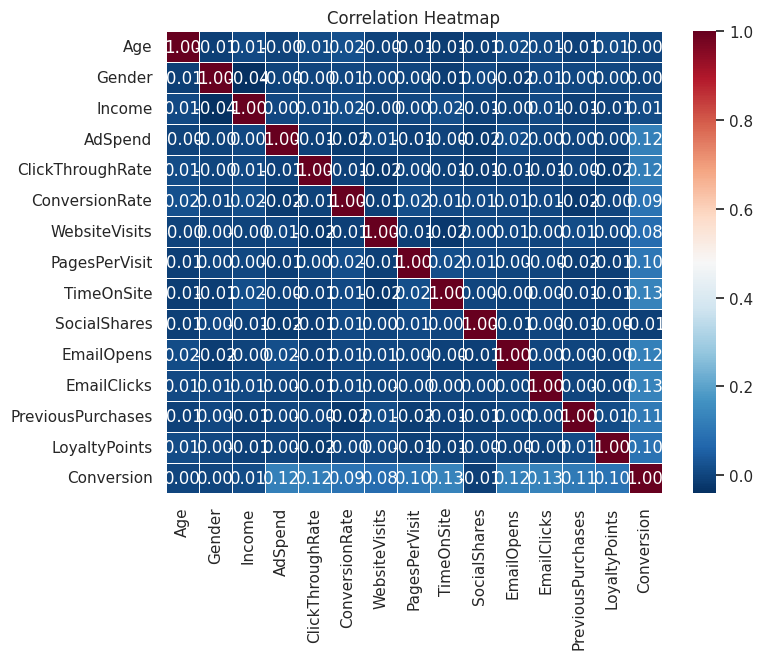

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True) # 수치형 데이터의 상관계수 계산

# 2. 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr,
            annot=True,      # 수치 표시 여부
            cmap='RdBu_r',   # 색상 지도 (Red-Blue 반전)
            fmt=".2f",       # 소수점 자리수
            linewidths=0.5)  # 셀 사이의 간격

plt.title('Correlation Heatmap')
plt.show()

# 스케일링

In [4]:
from sklearn.preprocessing import StandardScaler

# 1. 스케일링할 수치형 변수 리스트 선택
# 'Conversion'은 타겟값이므로 제외
numeric_features = [
    'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'
]

# 2. 독립변수(X)와 종속변수(y) 분리
X = df_final.drop('Conversion', axis=1)
y = df_final['Conversion']

# 3. 데이터 분할 (학습용/테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. 스케일링 수행
scaler = StandardScaler()

# 학습 데이터로 기준(평균, 표준편차)을 잡고 변환
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# 테스트 데이터는 학습 데이터의 기준을 그대로 적용
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("스케일링 완료! 이제 모델에 주입할 준비가 되었습니다.")

스케일링 완료! 이제 모델에 주입할 준비가 되었습니다.


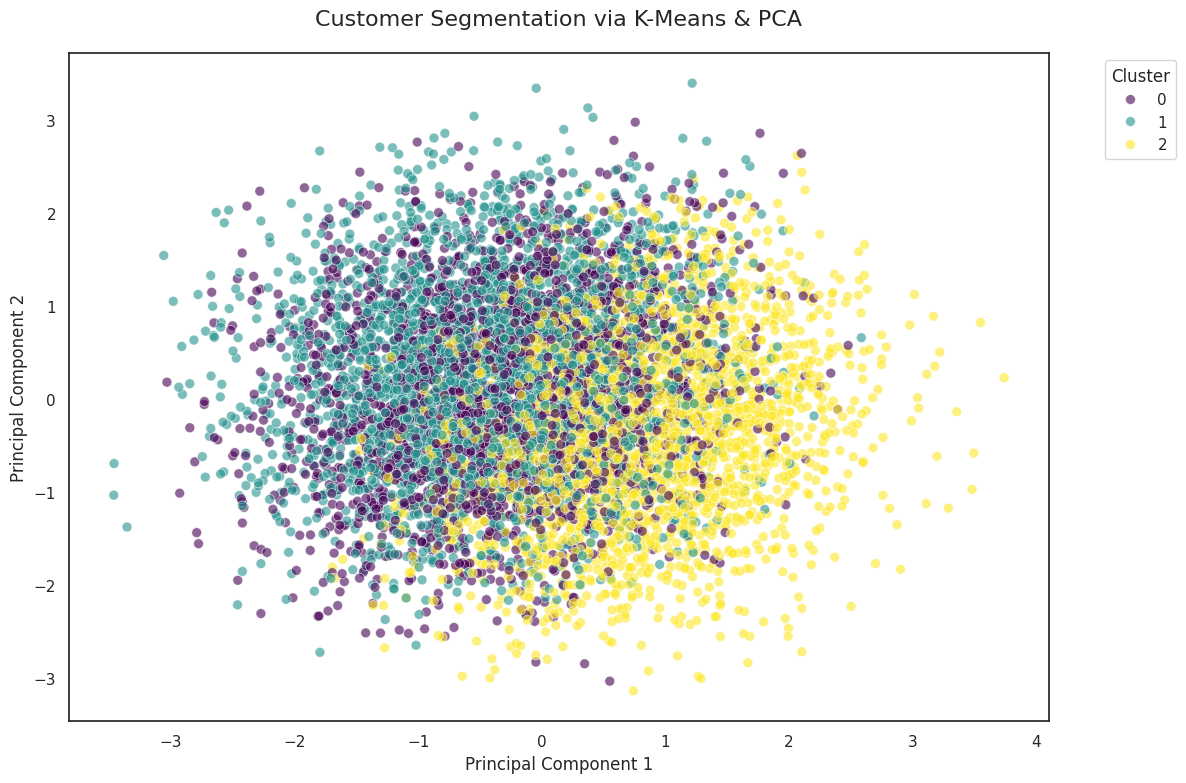

               Income      AdSpend  ClickThroughRate  ConversionRate  \
Cluster                                                                
0        81027.555143  3075.474239          0.161515        0.054947   
1        84714.683983  7945.044283          0.147664        0.099691   
2        88023.162655  3378.442363          0.156897        0.156332   

         WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  EmailOpens  \
Cluster                                                                       
0            25.521685       5.324373    7.591280     49.567947    9.133416   
1            25.093906       5.455776    7.417390     47.454545    9.892774   
2            23.628882       5.869717    8.217715     52.751553    9.314829   

         EmailClicks  PreviousPurchases  LoyaltyPoints  
Cluster                                                 
0           4.346964           4.741016    2558.621231  
1           4.558775           4.600067    2502.403263  
2           4.4

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def run_unsupervised_learning(df_final):
    # 1. 데이터 준비 및 스케일링
    # 지도학습에 사용했던 수치형 변수들만 선택
    features = ['Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']

    x = df_final[features]
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # 2. K-Means 군집화 (고객을 3개 그룹으로 분류)
    # n_clusters는 엘보우 메소드 등을 통해 최적화할 수 있으나, 보통 3~5개가 적당합니다.
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df_final['Cluster'] = kmeans.fit_predict(x_scaled)

    # 3. PCA (차원 축소) - 20개가 넘는 변수를 2차원으로 압축하여 시각화
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(x_scaled)
    df_final['PCA1'] = pca_features[:, 0]
    df_final['PCA2'] = pca_features[:, 1]

    # 4. 시각화 (영문 텍스트 적용)
    plt.figure(figsize=(12, 8))
    sns.set_theme(style="white")

    # Cluster별로 색상을 다르게 하여 산점도 작성
    scatter = sns.scatterplot(
        x='PCA1', y='PCA2', hue='Cluster',
        data=df_final, palette='viridis', alpha=0.6, s=50

    )

    plt.title('Customer Segmentation via K-Means & PCA', fontsize=16, pad=20)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



    # 5. 군집별 특징 요약
    cluster_summary = df_final.groupby('Cluster')[features].mean()
    return cluster_summary


# 코드 실행
summary = run_unsupervised_learning(df_final)
print(summary)



## 모델 정의

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# 모델 정의
model = Sequential([
    # 입력층 + 첫 번째 은닉층 (입력 데이터의 피처 수에 맞춰 자동으로 설정)
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(), # 학습을 안정화시키고 속도를 높임
    Dropout(0.2),         # 20%의 노드를 무작위로 꺼서 과적합 방지

    # 두 번째 은닉층
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # 세 번째 은닉층
    Dense(16, activation='relu'),

    # 출력층 (이진 분류이므로 sigmoid 사용)
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 192 (768.00 B)

## 학습

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 검증 손실(val_loss)이 5회 연속 개선되지 않으면 학습 중단
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2, # 훈련 데이터의 20%를 검증에 사용
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5422 - auc: 0.5421 - loss: 0.8299 - val_accuracy: 0.8805 - val_auc: 0.7352 - val_loss: 0.3544
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8697 - auc: 0.6862 - loss: 0.3613 - val_accuracy: 0.8859 - val_auc: 0.8061 - val_loss: 0.2958
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - auc: 0.7598 - loss: 0.3154 - val_accuracy: 0.8977 - val_auc: 0.8185 - val_loss: 0.2808
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8813 - auc: 0.7733 - loss: 0.3176 - val_accuracy: 0.8977 - val_auc: 0.8238 - val_loss: 0.2753
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8899 - auc: 0.7804 - loss: 0.3001 - val_accuracy: 0.9016 - val_auc: 0.8248 - val_loss: 0.2715
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8976 - auc: 0.7537 - loss: 0.2960 - val_accuracy: 0.9000 - val_auc: 0.8283 - val_loss: 0.2681
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━

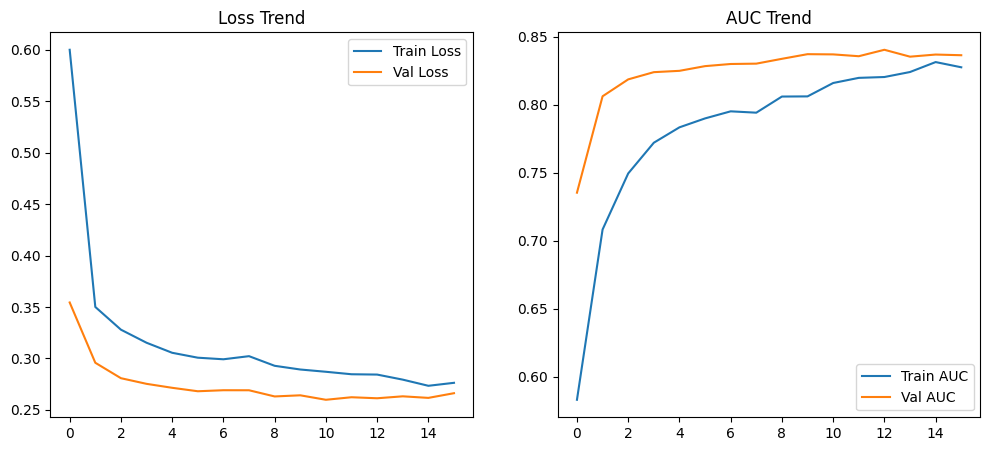

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과 시각화
plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Trend')
plt.legend()

# AUC 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('AUC Trend')
plt.legend()

plt.show()

## confusion matrix

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
### Classification Report ###
              precision    recall  f1-score   support

           0       0.71      0.25      0.37       198
           1       0.90      0.99      0.94      1402

    accuracy                           0.90      1600
   macro avg       0.81      0.62      0.66      1600
weighted avg       0.88      0.90      0.87      1600



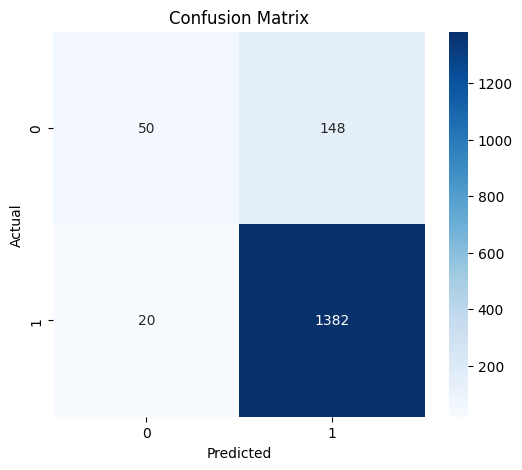

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 예측값 생성 (0.5를 기준으로 0 또는 1로 분류)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 상세 성적표 출력
print("### Classification Report ###")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 변수 중요도

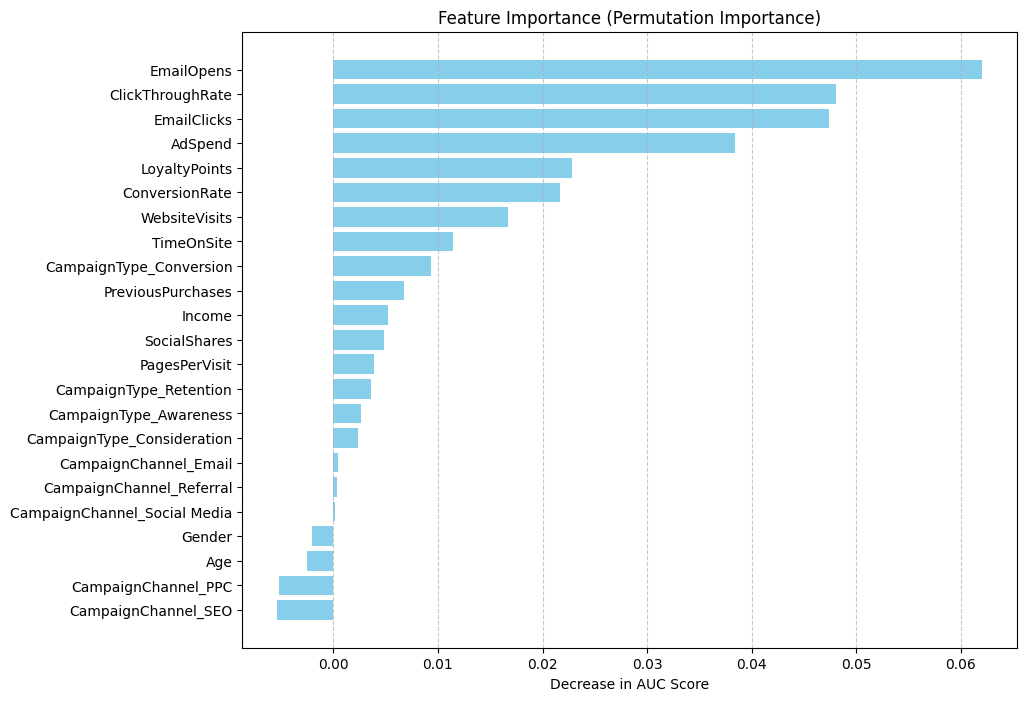

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_feature_importance(model, X_val, y_val, feature_names):
    # 기준 성능(AUC) 계산 (모델 컴파일 시 metrics=['auc']가 포함)
    # evaluate는 [loss, accuracy, auc] 순으로 반환하므로 인덱스 2를 가져옵니다.
    baseline_auc = model.evaluate(X_val, y_val, verbose=0)[2]
    importances = []

    # X_val이 Numpy 배열인지 확인하고 복사본 생성
    X_val_copy = np.array(X_val).copy()

    for i in range(X_val_copy.shape[1]):
        save_col = X_val_copy[:, i].copy()

        # 해당 열만 무작위로 섞기
        np.random.shuffle(X_val_copy[:, i])

        # 섞인 데이터로 성능 측정
        shuffled_auc = model.evaluate(X_val_copy, y_val, verbose=0)[2]

        # 성능 차이 기록 (많이 떨어질수록 중요한 변수)
        importances.append(baseline_auc - shuffled_auc)

        # 데이터 원복
        X_val_copy[:, i] = save_col

    return importances

# 1. 중요도 계산 실행 (X_test와 y_test를 그대로 넣습니다)
importances = get_feature_importance(model, X_test, y_test, X.columns)

# 2. 결과 시각화
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Decrease in AUC Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 방해변수 제거 (Age, Gender , CampaignChanmel~_

In [6]:
# 1. 제거할 모든 변수 리스트 만들기
campaign_cols = [col for col in X.columns if col.startswith('CampaignChannel')]
cols_to_drop = campaign_cols + ['Gender', 'Age']

# 2. 한 번에 드랍
X_reduced = X.drop(columns=cols_to_drop)

print(f"최종 남은 변수: {X_reduced.columns.tolist()}")

# 3. 데이터 다시 분할 (기존의 랜덤 시드 유지)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# 1. 스케일링 대상 리스트에서 'Age'를 제거합니다.
# 직접 리스트를 다시 정의하는 것이 가장 깔끔
numeric_features = [
    'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'
]

# 2. 스케일링 수행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("스케일링 성공! 이제 모델 학습으로 넘어가시면 됩니다.")

최종 남은 변수: ['Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'CampaignType_Awareness', 'CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention']
스케일링 성공! 이제 모델 학습으로 넘어가시면 됩니다.


## 학습

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


# 이전과 동일한 구조, 입력 크기는 자동으로 반영됨
model_reduced = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_reduced.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# 조기 종료 설정 및 재학습
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_reduced = model_reduced.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - auc: 0.5741 - loss: 0.4079 - val_accuracy: 0.8813 - val_auc: 0.7959 - val_loss: 0.3329
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8777 - auc: 0.7267 - loss: 0.3360 - val_accuracy: 0.8852 - val_auc: 0.8223 - val_loss: 0.2911
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8825 - auc: 0.7472 - loss: 0.3246 - val_accuracy: 0.8922 - val_auc: 0.8330 - val_loss: 0.2753
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8865 - auc: 0.7919 - loss: 0.3030 - val_accuracy: 0.8984 - val_auc: 0.8430 - val_loss: 0.2660
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8784 - auc: 0.7597 - loss: 0.3252 - val_accuracy: 0.9039 - val_auc: 0.8396 - val_loss: 0.2611
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8870 - auc: 0.7883 - loss: 0.3018 - val_accuracy: 0.9070 - val_auc: 0.8511 - val_loss: 0.2547
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 

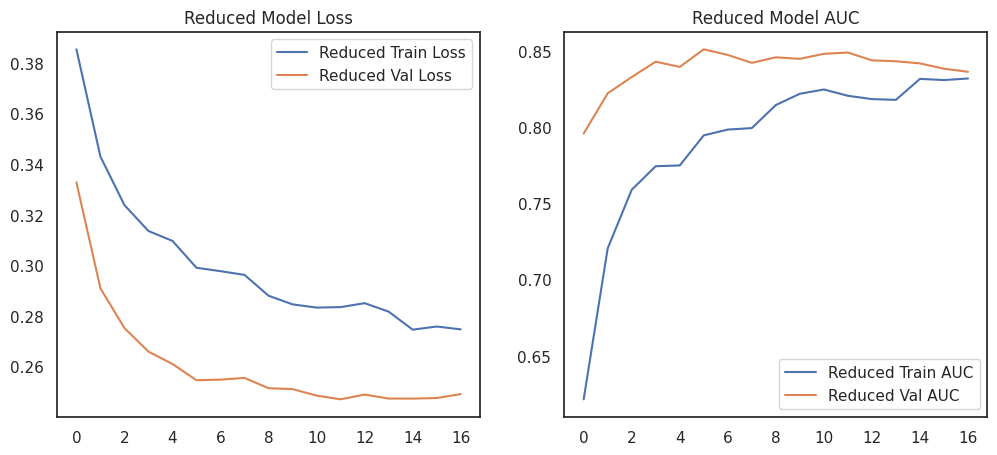

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss 비교
plt.subplot(1, 2, 1)
plt.plot(history_reduced.history['loss'], label='Reduced Train Loss')
plt.plot(history_reduced.history['val_loss'], label='Reduced Val Loss')
plt.title('Reduced Model Loss')
plt.legend()

# AUC 비교
plt.subplot(1, 2, 2)
plt.plot(history_reduced.history['auc'], label='Reduced Train AUC')
plt.plot(history_reduced.history['val_auc'], label='Reduced Val AUC')
plt.title('Reduced Model AUC')
plt.legend()

plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
### [제거 후 모델] 최종 성적표 ###
              precision    recall  f1-score   support

           0       0.62      0.27      0.37       198
           1       0.90      0.98      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.76      0.62      0.66      1600
weighted avg       0.87      0.89      0.87      1600



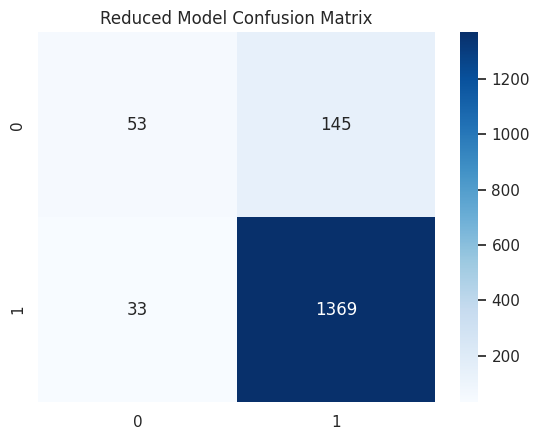

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 예측 (0.5 기준)
y_pred_reduced = (model_reduced.predict(X_test) > 0.5).astype("int32")

print("### [제거 후 모델] 최종 성적표 ###")
print(classification_report(y_test, y_pred_reduced))

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred_reduced)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Reduced Model Confusion Matrix')
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

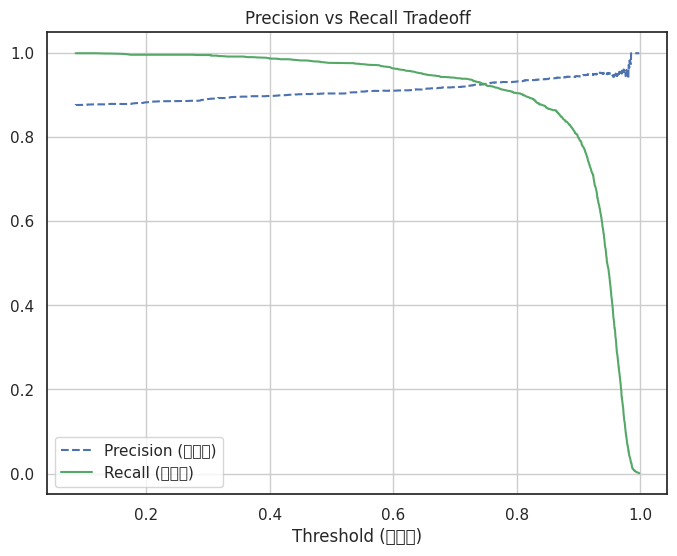

In [12]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 1. 테스트 데이터에 대한 예측 확률 추출
y_scores = model_reduced.predict(X_test)

# 2. 임계값에 따른 정밀도와 재현율 계산
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# 3. 시각화
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision (정밀도)")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall (재현율)")
plt.xlabel("Threshold (임계값)")
plt.title("Precision vs Recall Tradeoff")
plt.legend()
plt.grid()
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 원하는 임계값 설정
custom_threshold = 0.3

# 설정한 임계값에 따라 0 또는 1로 분류
y_pred_custom = (y_scores > custom_threshold).astype(int)

print(f"--- 임계값 {custom_threshold} 적용 시 성적표 ---")
print(classification_report(y_test, y_pred_custom))

# 혼동 행렬로 확인 (얼마나 더 많이 1로 예측했는지 확인 가능)
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:")
print(cm)

--- 임계값 0.3 적용 시 성적표 ---
              precision    recall  f1-score   support

           0       0.82      0.14      0.24       198
           1       0.89      1.00      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.86      0.57      0.59      1600
weighted avg       0.88      0.89      0.85      1600

Confusion Matrix:
[[  28  170]
 [   6 1396]]


In [14]:
# F1 스코어 계산
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"F1-Score를 최대화하는 최적 임계값: {best_threshold:.4f}")

F1-Score를 최대화하는 최적 임계값: 0.3568


In [15]:
# 1. 테스트 세트에 대한 확률 가져오기
y_probs = model_reduced.predict(X_test)

# 2. 찾은 최적 임계값 적용
best_threshold = 0.3568
y_final_pred = (y_probs >= best_threshold).astype(int)

# 3. 실제 데이터와 예측 확률을 합친 결과 테이블 생성
# (X_test가 스케일링된 상태이므로 원본 인덱스를 활용해 매칭)
results_df = pd.DataFrame({
    'Actual_Conversion': y_test.values,
    'Predict_Prob': y_probs.flatten(),
    'Final_Decision': y_final_pred.flatten()
})

# 전환 확률이 높은 순서대로 정렬
top_leads = results_df.sort_values(by='Predict_Prob', ascending=False)
print(top_leads.head(10))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
      Actual_Conversion  Predict_Prob  Final_Decision
723                   1      0.998171               1
891                   1      0.996913               1
215                   1      0.996245               1
1566                  1      0.995363               1
1260                  1      0.993471               1
1115                  1      0.992803               1
974                   1      0.992530               1
1124                  1      0.991142               1
1006                  1      0.991004               1
1013                  1      0.990887               1


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


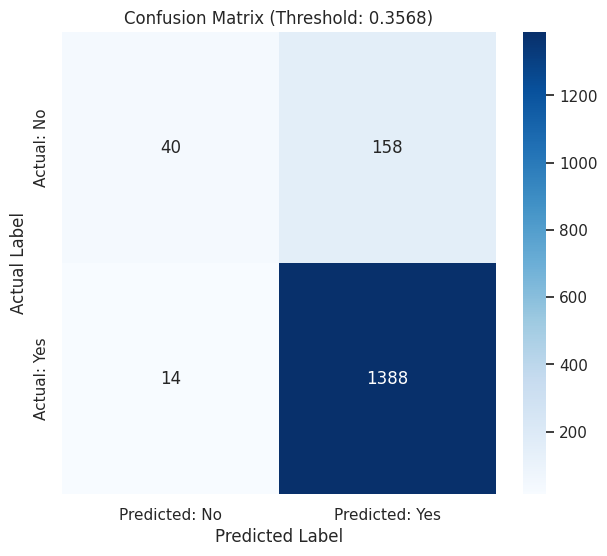

--- [임계값 0.3793 적용 시 성적표] ---
              precision    recall  f1-score   support

           0       0.74      0.20      0.32       198
           1       0.90      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.82      0.60      0.63      1600
weighted avg       0.88      0.89      0.86      1600



In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1. 예측 확률 가져오기
y_probs = model_reduced.predict(X_test)

# 2. 새로운 임계값(0.3568) 적용
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# 3. 혼동 행렬 계산
cm_custom = confusion_matrix(y_test, y_pred_custom)

# 4. 시각화
plt.figure(figsize=(7, 6))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])

plt.title(f'Confusion Matrix (Threshold: {best_threshold})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 상세 지표 출력
print(f"--- [임계값 {custom_threshold} 적용 시 성적표] ---")
print(classification_report(y_test, y_pred_custom))

In [18]:
# 모델 저장
model_reduced.save('final_marketing_model.keras')
print("모델 저장 완료: final_marketing_model.keras")

모델 저장 완료: final_marketing_model.keras


In [19]:
import joblib

# 스케일러 저장
joblib.dump(scaler, 'marketing_scaler.pkl')
print("스케일러 저장 완료: marketing_scaler.pkl")

스케일러 저장 완료: marketing_scaler.pkl


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score

# 1. Keras 모델을 위한 사이킷런 래퍼 클래스 (에러 방지용)
class KerasWrapper:
    def __init__(self, model):
        self.model = model
        self._estimator_type = "classifier"
        self.classes_ = np.array([0, 1])

    def fit(self, X, y): return self # 검증 통과용

    def predict(self, X):
        return (self.model.predict(X, verbose=0) > 0.5).astype(int)

    def predict_proba(self, X):
        prob = self.model.predict(X, verbose=0)
        return np.hstack([1-prob, prob])

    def score(self, X, y):
        y_pred = self.model.predict(X, verbose=0)
        return roc_auc_score(y, y_pred)

# 2. 중요도 계산 (X_test와 y_test 사용)
wrapper = KerasWrapper(model_reduced)
result = permutation_importance(
    wrapper, X_test, y_test,
    n_repeats=5,
    random_state=42,
    scoring='roc_auc'
)

# 3. 결과 정리 (음수 값은 0으로 처리하여 시각화 가독성 높임)
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': [max(0, x) for x in result.importances_mean]
}).sort_values(by='importance', ascending=False)

# 4. 피클 파일로 저장
joblib.dump(feature_importance_df, 'feature_importance.pkl')

print("정제된 모델의 중요도 저장 완료!")
print(feature_importance_df.head())

✅ 정제된 모델의 중요도 저장 완료!
          feature  importance
1         AdSpend    0.039697
8      EmailOpens    0.037211
6      TimeOnSite    0.036803
9     EmailClicks    0.032463
3  ConversionRate    0.029389


In [ ]:
import joblib

# 이전에 계산했던 중요도 데이터프레임 (예: feature_importance_df)

joblib.dump(feature_importance_df, 'feature_importance.pkl')
print("중요도 데이터 저장 완료!")